In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,cross_validation,ensemble

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def load_data_classification():
    '''
    加载用于分类问题的数据集
    : return:一个元祖   用于分类问题 元祖元素依次为：训练样本集 测试样本集 训练样本集对应的标记  测试样本集对应的标记
    '''
    digits=datasets.load_digits()   #手写数字 数据集
    return cross_validation.train_test_split(digits.data,digits.target,test_size=0.25,random_state=0,stratify=digits.target)

In [3]:
def test_GradientBoostingClassifier(*data):
    '''
    测试 GradientBoostingClassifier 梯度提升模型的用法
    '''
    X_train,X_test,y_train,y_test=data
    clf=ensemble.GradientBoostingClassifier()  
    clf.fit(X_train,y_train)
    print('Train score:%f'%clf.score(X_train,y_train))
    print('Test score:%f'%clf.score(X_test,y_test))

In [4]:
X_train,X_test,y_train,y_test=load_data_classification()
test_GradientBoostingClassifier(X_train,X_test,y_train,y_test)

'''
GBDT 模型对训练集 100% 吻合
'''

Train score:1.000000
Test score:0.960000


In [7]:
def test_GradientBoostingClassifier_num(*data):
    '''
    测试 GradientBoostingClassifier 的预测性能随 n_estimators 参数影响
    '''
    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,100,step=2)
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    traing_scores=[]
    testing_scores=[]
    for num in nums:
        clf=ensemble.GradientBoostingClassifier(n_estimators=num) 
        clf.fit(X_train,y_train)
        traing_scores.append(clf.score(X_train,y_train) )
        testing_scores.append(clf.score(X_test,y_test) )
    ax.plot(nums,traing_scores,label='Traing score')
    ax.plot(nums,testing_scores,label='Testing score')
    ax.set_xlabel('estimator num')
    ax.set_ylabel('score')
    ax.legend(loc='lower right')
    ax.set_title('GradientBoostingClassifier')
    plt.show()
    
'''
随着个体决策树数量不断增长  GBDT的性能能很快上升并保持稳定，且对训练集一直保持完美拟合
对测试集预测准确率达到 95%  可以看到 GDBT可以很好的抵抗过拟合
'''

'\n随着个体决策树数量不断增长  GBDT的性能能很快上升并保持稳定，且对训练集一直保持完美拟合\n对测试集预测准确率达到 95%  可以看到 GDBT可以很好的抵抗过拟合\n'

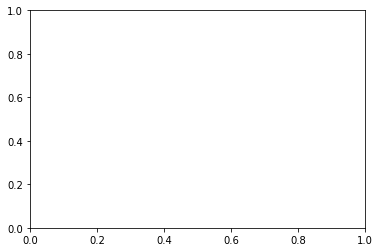

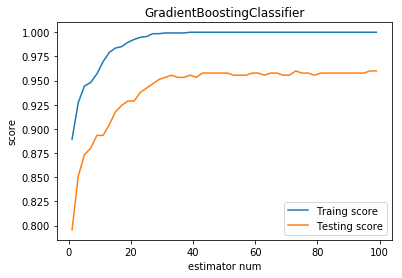

In [8]:
test_GradientBoostingClassifier_num(X_train,X_test,y_train,y_test)

In [9]:
def test_GradientBoostingClassifier_maxdepth(*data):
    '''
    测试 GradientBoostingClassifier 的预测性能随 max_depth 参数影响
    '''
    X_train,X_test,y_train,y_test=data
    maxdepths=np.arange(1,20)
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    traing_scores=[]
    testing_scores=[]
    for maxdepth in maxdepths:
        clf=ensemble.GradientBoostingClassifier(max_depth=maxdepth) 
        clf.fit(X_train,y_train)
        traing_scores.append(clf.score(X_train,y_train) )
        testing_scores.append(clf.score(X_test,y_test) )
    ax.plot(maxdepths,traing_scores,label='Traing score')
    ax.plot(maxdepths,testing_scores,label='Testing score')
    ax.set_xlabel('max_depth')
    ax.set_ylabel('score')
    ax.legend(loc='lower right')
    ax.set_ylim(0,1.05)
    ax.set_title('GradientBoostingClassifier')
    plt.show()
    
'''
随着个体决策树的最大深度不断增大  GBDT对训练集的拟合一直都比较好吗，但是GBDT对于预测的拟合有所波动
          树的深度越大发生过拟合
'''

'\n随着个体决策树的最大深度不断增大  GBDT对训练集的拟合一直都比较好吗，但是GBDT对于预测的拟合有所波动\n          树的深度越大发生过拟合\n'

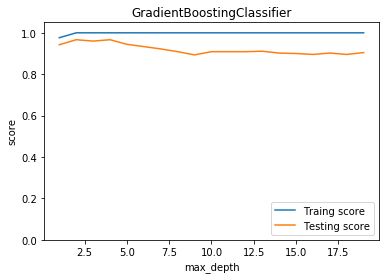

In [10]:
test_GradientBoostingClassifier_maxdepth(X_train,X_test,y_train,y_test)

In [13]:
def test_GradientBoostingClassifier_learning(*data):
    '''
    测试 GradientBoostingClassifier 的预测性能随 学习率 参数影响
    '''
    X_train,X_test,y_train,y_test=data
    learning_rates=np.linspace(0.01,1)
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    traing_scores=[]
    testing_scores=[]
    for learning_rate in learning_rates:
        clf=ensemble.GradientBoostingClassifier(learning_rate=learning_rate) 
        clf.fit(X_train,y_train)
        traing_scores.append(clf.score(X_train,y_train) )
        testing_scores.append(clf.score(X_test,y_test) )
    ax.plot(learning_rates,traing_scores,label='Traing score')
    ax.plot(learning_rates,testing_scores,label='Testing score')
    ax.set_xlabel('learning_rates')
    ax.set_ylabel('score')
    ax.legend(loc='lower right')
    ax.set_ylim(0,1.05)
    ax.set_title(' GradientBoostingClassifier')
    plt.show()
    
'''
由于学习率必须大于0  所以在学习率比较小时 预测准确率有一个上升阶段 但总体平稳
'''

'\n由于学习率必须大于0  所以在学习率比较小时 预测准确率有一个上升阶段 但总体平稳\n'

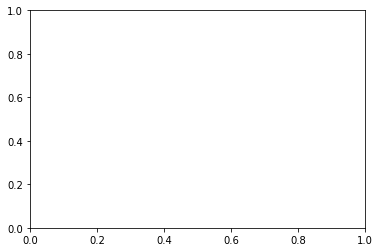

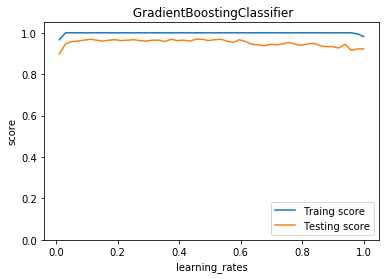

In [14]:
test_GradientBoostingClassifier_learning(X_train,X_test,y_train,y_test)

In [15]:
def test_GradientBoostingClassifier_subsample(*data):
    '''
    测试 GradientBoostingClassifier 的预测性能随 subsample 参数影响
    
    当 subsample！=1  就是随机梯形提升树
    '''
    X_train,X_test,y_train,y_test=data
    subsamples=np.linspace(0.01,1)
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    traing_scores=[]
    testing_scores=[]
    for subsample in subsamples:
        clf=ensemble.GradientBoostingClassifier(subsample=subsample) 
        clf.fit(X_train,y_train)
        traing_scores.append(clf.score(X_train,y_train) )
        testing_scores.append(clf.score(X_test,y_test) )
    ax.plot(subsamples,traing_scores,label='Traing score')
    ax.plot(subsamples,testing_scores,label='Testing score')
    ax.set_xlabel('subsample')
    ax.set_ylabel('score')
    ax.legend(loc='lower right')
    ax.set_ylim(0,1.05)
    ax.set_title(' GradientBoostingClassifier')
    plt.show()
    
'''
当 subsamples 小时 GBDT 预测性较差  原因是 每次随机挑选的训练样本太少 抛弃了大量样本信息
'''

'\n当 subsamples 小时 GBDT 预测性较差  原因是 每次随机挑选的训练样本太少 抛弃了大量样本信息\n'

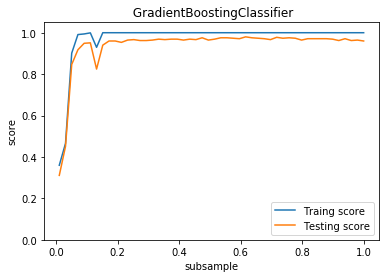

In [16]:
test_GradientBoostingClassifier_subsample(X_train,X_test,y_train,y_test)

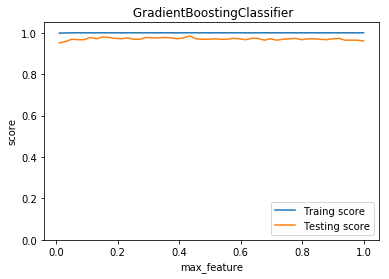

In [17]:
def test_GradientBoostingClassifier_max_features(*data):
    '''
    测试 GradientBoostingClassifier 的预测性能随 subsample 参数影响
    
    当 subsample！=1  就是随机梯形提升树
    '''
    X_train,X_test,y_train,y_test=data
    max_features=np.linspace(0.01,1)
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    traing_scores=[]
    testing_scores=[]
    for max_feature in max_features:
        clf=ensemble.GradientBoostingClassifier(max_features=max_feature) 
        clf.fit(X_train,y_train)
        traing_scores.append(clf.score(X_train,y_train) )
        testing_scores.append(clf.score(X_test,y_test) )
    ax.plot(max_features,traing_scores,label='Traing score')
    ax.plot(max_features,testing_scores,label='Testing score')
    ax.set_xlabel('max_feature')
    ax.set_ylabel('score')
    ax.legend(loc='lower right')
    ax.set_ylim(0,1.05)
    ax.set_title(' GradientBoostingClassifier')
    plt.show()
    
'''
 GBDT  对于 特征集合不是很敏感
'''
test_GradientBoostingClassifier_max_features(X_train,X_test,y_train,y_test)